# Plotting Density of States
In this short tutorial we will inspect the basic features of the `DoS` module of PyBigDFT.
We employ two runs as demonstrator of the comparison between two runs.
A Bulk run of a `AlN` system, followed by a Vacancy run.
The Vacancy is also provided with a Spin Collinear run, for comparison.

In [1]:
# let us now install the bigdft client (see previous lessons)
!wget https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/packaging/install.py &> /dev/null
import install
install.client() 

Mounted at /content/drive
Executing: mkdir -p /content/drive/MyDrive

Executing: git clone --depth 1 https://gitlab.com/luigigenovese/bigdft-school
Error Occurred:  
 fatal: destination path 'bigdft-school' already exists and is not an empty directory.

Executing: mkdir -p /content/drive/MyDrive/bigdft-school



In [10]:
from BigDFT import Logfiles as L
Vacancy = L.Logfile('scratch/VN2_last.log')
Bulk = L.Logfile('scratch/AlN_last.log')
VacancySpin = L.Logfile('scratch/VNspin_last.log')

## Description of the tests done
We will shot how to
1. Plot the DoS with the `plot` commodity function;
2. Get the curves from a get_curve function;
4. Handle those curves for external plotting;
3. Shifts the values of the curves wrt to a constant, or a dictionary of shifts;



### Simple plots of the two runs
We here show how the two runs behave.

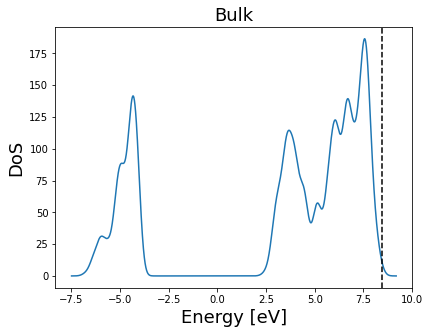

In [11]:
ax=Bulk.get_dos().plot()
_=ax.set_title('Bulk',fontsize=18)

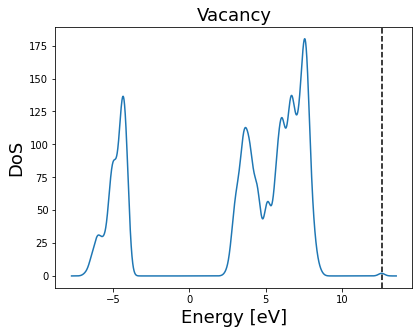

In [12]:
ax=Vacancy.get_dos().plot()
_=ax.set_title('Vacancy',fontsize=18)

### Plot a DoS of a collinear Spin calculation

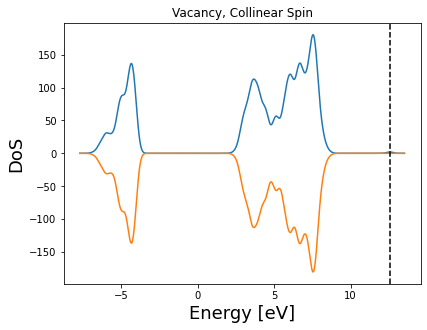

In [13]:
_=VacancySpin.get_dos().plot().set_title('Vacancy, Collinear Spin')

In [14]:
from BigDFT.DoS import DoS
dosspin = DoS(logfiles_dict={'SA':Vacancy, 'SC':VacancySpin})

Note the modification of the labels from the original definition.

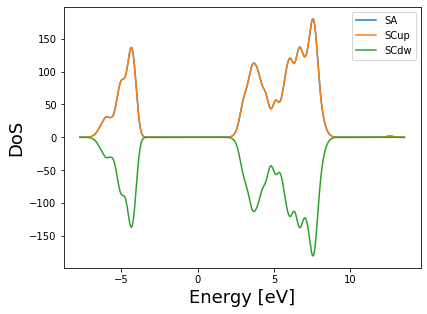

In [15]:
_=dosspin.plot().legend(loc='best')

In [16]:
list(dosspin.get_curves().keys())

['SA', 'SCup', 'SCdw']

### Plot of the two DoS together
We would like to compare the two runs. It is possible to instanciate a `DoS` class.

In [17]:
from BigDFT.DoS import DoS
dos = DoS(logfiles_dict={'Vacancy': Vacancy, 'Bulk': Bulk},
          fermi_level=Vacancy.fermi_level,units='AU') # last two as an option

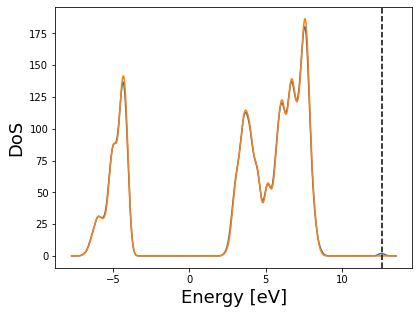

In [18]:
dos.plot()

The above plot show the tow DoS together. We may select a region:

Text(8, 160, 'Note the fermi_level here')

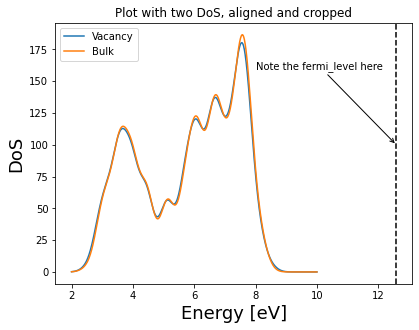

In [19]:
dos.set_range(e_min=2.0,e_max=10.0)
ax= dos.plot()
ax.legend(loc='best')
ax.set_title('Plot with two DoS, aligned and cropped')
ax.annotate('Note the fermi_level here', xytext=(8,160), xy=(dos.ef,100), arrowprops = dict(arrowstyle='->'))

(6.0, 8.0)

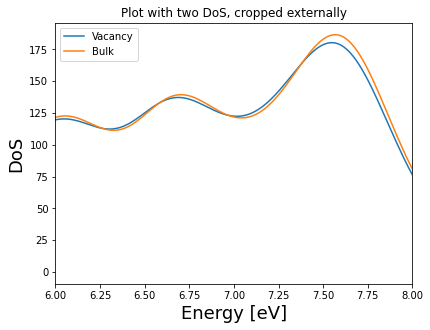

In [20]:
ax= dos.plot()
ax.legend(loc='best')
ax.set_title('Plot with two DoS, cropped externally')
ax.set_xlim([6,8])


### Handle the curves explicitly
Perform the difference between the curves and plot it

(-8.0, 15.0)

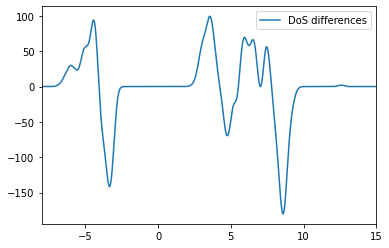

In [25]:
from matplotlib import pyplot as plt
dos.set_range(e_min=-100,e_max=100) # restore full range
curves = dos.get_curves()
x,yB = curves['Bulk']
x,yV = curves['Vacancy']
plt.plot(x,yV-yB,label='DoS differences')
plt.legend(loc='best')
plt.xlim([-8,15])


### Shift the curves and plot them shifted

(-8.0, 15.0)

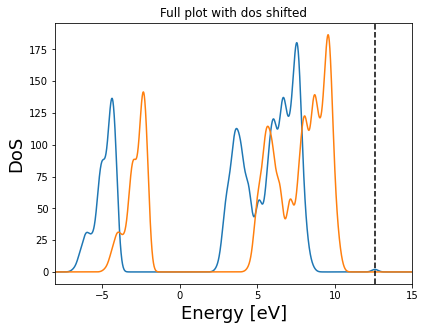

In [26]:
dos.shift_curves([0.0,1.0])
ax=dos.plot()
ax.set_title('Full plot with dos shifted')
ax.set_xlim([-8,15])

## Handle curves from spin-polarized calculations
We show also an example on customized plots where DoS differences are plot next to the original curves.

In [27]:
curves = dosspin.get_curves()
differences = {'up-down': curves['SCup'].y + curves['SCdw'].y,
               'Noncollinear-Collinear': curves['SA'].y - curves['SCup'].y}
x = dosspin.range

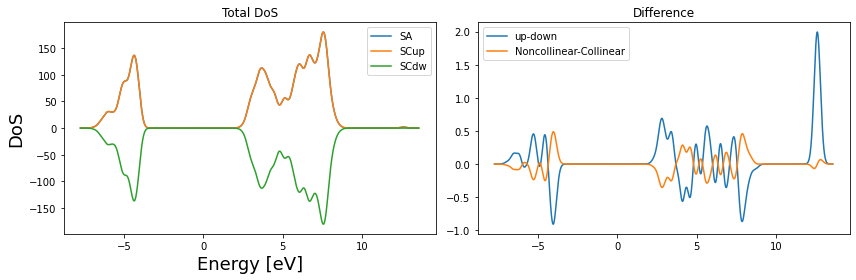

In [28]:
from matplotlib import pyplot as plt
fig, (axT, axD) = plt.subplots(1,2,figsize=(12,4))
dosspin.plot(ax=axT)
axT.legend(loc='best')
axT.set_title('Total DoS')
for label, curve in differences.items():
    axD.plot(x,curve,label=label)
axD.legend(loc='best')
axD.set_title('Difference')
fig.tight_layout()